In [19]:
from textblob import TextBlob
import codecs
import pandas as pd
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pandas_datareader import data as web
import datetime
import numpy as np

In [20]:
#STOCK PREDICTION USING TWITTER SENTIMENT ANALYSIS
df = pd.read_excel("clean_tweet_data_master.xlsx")
#ata
x=df["cleaned_text"]
for i in x:
    #print(i)
    blob=TextBlob(i)
    print(blob.sentiment)





Sentiment(polarity=-0.049999999999999996, subjectivity=0.21666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.025, subjectivity=0.25)
Sentiment(polarity=-0.07916666666666666, subjectivity=0.3666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.15)
Sentiment(polarity=0.0909090909090909, subjectivity=0.3333333333333333)
Sentiment(polarity=0.7666666666666666, subjectivity=0.5666666666666667)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.09999999999999998, subjectivity=0.95)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.75)
Sentiment(polarity=0.4, subjectivity=0.4)
Sentiment(polarity=-0.7142857142857143, subjectivity=

In [21]:
cdata=df[['date','cleaned_text']]
cdata

,date,cleaned_text
0,2020-03-30,unread malign narcissist forethought end next ...
1,2020-03-30,swap covid graph stock market graph boom probl...
2,2020-03-30,think might wait long buy switch everywher sol...
3,2020-03-30,stock market beast like indiffer human desir o...
4,2020-03-30,liquid shall never freez ice stockmarket close...
...,...,...
7718,2019-12-31,consid lite beer invest invest stockmarket sto...
7719,2019-12-31,lundin gold inc top pick stockchas stock finan...
7720,2019-12-31,ramp ecuador lundin gold inc stock financ stoc...
7721,2019-12-31,free trial readi green check newest featur bes...


In [22]:
#Creating a dataframe where we will combine the tweets date wise and store int
ccdata=pd.DataFrame(columns=['date','cleaned_text'])


In [23]:
indx=0
get_tweet=""
for i in range(0,len(cdata)-1):
    get_date=cdata.date.iloc[i]
    next_date=cdata.date.iloc[i+1]
    if(str(get_date)==str(next_date)):
        get_tweet=get_tweet+cdata.cleaned_text.iloc[i]+" "
    if(str(get_date)!=str(next_date)):
        ccdata.set_value(indx,'date',get_date)
        ccdata.set_value(indx,'cleaned_text',get_tweet)
        indx=indx+1
        get_tweet=" "

/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':
/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


In [24]:
ccdata #All the tweets has been clubbed as per their date

,date,cleaned_text
0,2020-03-30,unread malign narcissist forethought end next ...
1,2020-03-29,chines american surnam ccp agent usa slander ...
2,2020-03-28,ny gov andrew cuomo presid concern happen sto...
3,2020-03-27,real problem peopl make decis hospit govern b...
4,2020-03-26,wealthi investor use loss gener real estat mi...
...,...,...
68,2020-01-05,kag job unemploy yr low stock market break rc...
69,2020-01-04,livermor noth new wall street specul old hill...
70,2020-01-03,track stockmarket reaction us airstrik kill s...
71,2020-01-02,close look mani peopl built great fortun unle...


In [25]:
read_stock_p=pd.read_excel('Dow.xlsx')

read_stock_p=read_stock_p[2:][['Attributes','Close']].rename(columns={"Attributes": "Date"}).reset_index(drop=True)
read_stock_p['Date']=read_stock_p['Date'].dt.strftime('%Y-%m-%d')
read_stock_p

,Date,Close
0,2020-01-02,53.75
1,2020-01-03,52.42
2,2020-01-06,52.21
3,2020-01-07,52.19
4,2020-01-08,52.73
...,...,...
57,2020-03-25,30.38
58,2020-03-26,29.68
59,2020-03-27,28.56
60,2020-03-30,28.65


In [26]:
#Adding a "Price" column in our dataframe and fetching the stock price as per the date in our dataframe
ccdata['Prices']=""

In [27]:
indx=0
for i in range (0,len(ccdata)):
    for j in range (0,len(read_stock_p)):
        get_tweet_date=ccdata.date.iloc[i]
        get_stock_date=read_stock_p.Date.iloc[j]
        if(str(get_stock_date)==str(get_tweet_date)):
            #print(get_stock_date," ",get_tweet_date)
            ccdata.set_value(i,'Prices',int(read_stock_p.Close[j]))
            break

/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [28]:
#Prices are fetched but some entires are blank as close price might not be available for that day due to some 
#reason (like holiday, etc.)
ccdata

,date,cleaned_text,Prices
0,2020-03-30,unread malign narcissist forethought end next ...,28
1,2020-03-29,chines american surnam ccp agent usa slander ...,
2,2020-03-28,ny gov andrew cuomo presid concern happen sto...,
3,2020-03-27,real problem peopl make decis hospit govern b...,28
4,2020-03-26,wealthi investor use loss gener real estat mi...,29
...,...,...,...
68,2020-01-05,kag job unemploy yr low stock market break rc...,
69,2020-01-04,livermor noth new wall street specul old hill...,
70,2020-01-03,track stockmarket reaction us airstrik kill s...,52
71,2020-01-02,close look mani peopl built great fortun unle...,53


In [29]:
#Forward fill NaN values in the Prices Column
ccdata['Prices'] = ccdata['Prices'].replace('', np.NaN)
ccdata['Prices'] = ccdata['Prices'].fillna(method='ffill')
ccdata

,date,cleaned_text,Prices
0,2020-03-30,unread malign narcissist forethought end next ...,28.0
1,2020-03-29,chines american surnam ccp agent usa slander ...,28.0
2,2020-03-28,ny gov andrew cuomo presid concern happen sto...,28.0
3,2020-03-27,real problem peopl make decis hospit govern b...,28.0
4,2020-03-26,wealthi investor use loss gener real estat mi...,29.0
...,...,...,...
68,2020-01-05,kag job unemploy yr low stock market break rc...,52.0
69,2020-01-04,livermor noth new wall street specul old hill...,52.0
70,2020-01-03,track stockmarket reaction us airstrik kill s...,52.0
71,2020-01-02,close look mani peopl built great fortun unle...,53.0


In [30]:
#Making "Prices" column as integer so mathematical operations could be performed easily
ccdata['Prices'] = ccdata['Prices'].apply(np.int64)

In [31]:
#Adding 4 new columns in our dataframe so that sentiment analysis could be performed.. 
#Comp is "Compound" it will tell whether the statement is overall negative or positive. 
#If it has negative value then it is negative, if it has positive value then it is positive. 
#If it has value 0, then it is neutral

ccdata["Comp"] = ''
ccdata["Negative"] = ''
ccdata["Neutral"] = ''
ccdata["Positive"] = ''
ccdata

,date,cleaned_text,Prices,Comp,Negative,Neutral,Positive
0,2020-03-30,unread malign narcissist forethought end next ...,28,,,,
1,2020-03-29,chines american surnam ccp agent usa slander ...,28,,,,
2,2020-03-28,ny gov andrew cuomo presid concern happen sto...,28,,,,
3,2020-03-27,real problem peopl make decis hospit govern b...,28,,,,
4,2020-03-26,wealthi investor use loss gener real estat mi...,29,,,,
...,...,...,...,...,...,...,...
68,2020-01-05,kag job unemploy yr low stock market break rc...,52,,,,
69,2020-01-04,livermor noth new wall street specul old hill...,52,,,,
70,2020-01-03,track stockmarket reaction us airstrik kill s...,52,,,,
71,2020-01-02,close look mani peopl built great fortun unle...,53,,,,


In [32]:
import nltk
#nltk.download('vader_lexicon')

In [33]:
#This part of the code is responsible for assigning the polarity for each statement. 
#That is how much positive, negative, neutral you statement is. And also assign the compound value that is 
#overall sentiment of the statement

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata
sentiment_i_a = SentimentIntensityAnalyzer()
for indexx, row in ccdata.T.iteritems():
    try:
        sentence_i = unicodedata.normalize('NFKD', ccdata.loc[indexx, 'cleaned_text'])
        sentence_sentiment = sentiment_i_a.polarity_scores(sentence_i)
        ccdata.set_value(indexx, 'Comp', sentence_sentiment['compound'])
        ccdata.set_value(indexx, 'Negative', sentence_sentiment['neg'])
        ccdata.set_value(indexx, 'Neutral', sentence_sentiment['neu'])
        ccdata.set_value(indexx, 'Positive', sentence_sentiment['pos'])
    except TypeError:
        print (stocks_dataf.loc[indexx, 'Tweets'])
        print (indexx)



/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


In [34]:
ccdata

,date,cleaned_text,Prices,Comp,Negative,Neutral,Positive
0,2020-03-30,unread malign narcissist forethought end next ...,28,-0.9971,0.143,0.735,0.121
1,2020-03-29,chines american surnam ccp agent usa slander ...,28,-0.9925,0.135,0.745,0.12
2,2020-03-28,ny gov andrew cuomo presid concern happen sto...,28,0.9985,0.111,0.726,0.163
3,2020-03-27,real problem peopl make decis hospit govern b...,28,-0.988,0.138,0.727,0.135
4,2020-03-26,wealthi investor use loss gener real estat mi...,29,-0.9995,0.148,0.737,0.116
...,...,...,...,...,...,...,...
68,2020-01-05,kag job unemploy yr low stock market break rc...,52,0.9231,0.12,0.747,0.133
69,2020-01-04,livermor noth new wall street specul old hill...,52,0.9951,0.093,0.758,0.148
70,2020-01-03,track stockmarket reaction us airstrik kill s...,52,-0.963,0.136,0.738,0.126
71,2020-01-02,close look mani peopl built great fortun unle...,53,0.9986,0.114,0.703,0.183


% of positive tweets=  73.97260273972603
% of negative tweets=  26.027397260273972


[]

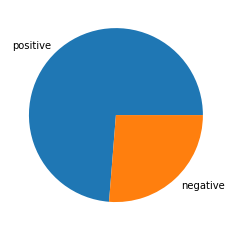

In [35]:
#Calculating the percentage of postive and negative tweets, and plotting the PIE chart for the same
import matplotlib.pyplot as plt
posi=0
nega=0
for i in range (0,len(ccdata)):
    get_val=ccdata.Comp[i]
    if(float(get_val)<(0)):
        nega=nega+1
    if(float(get_val>(0))):
        posi=posi+1
posper=(posi/(len(ccdata)))*100
negper=(nega/(len(ccdata)))*100
print("% of positive tweets= ",posper)
print("% of negative tweets= ",negper)
arr=np.asarray([posper,negper], dtype=int)
plt.pie(arr,labels=['positive','negative'])
plt.plot()


In [36]:
df_=ccdata[['date','Prices','Comp','Negative','Neutral','Positive']].copy()
df_

,date,Prices,Comp,Negative,Neutral,Positive
0,2020-03-30,28,-0.9971,0.143,0.735,0.121
1,2020-03-29,28,-0.9925,0.135,0.745,0.12
2,2020-03-28,28,0.9985,0.111,0.726,0.163
3,2020-03-27,28,-0.988,0.138,0.727,0.135
4,2020-03-26,29,-0.9995,0.148,0.737,0.116
...,...,...,...,...,...,...
68,2020-01-05,52,0.9231,0.12,0.747,0.133
69,2020-01-04,52,0.9951,0.093,0.758,0.148
70,2020-01-03,52,-0.963,0.136,0.738,0.126
71,2020-01-02,53,0.9986,0.114,0.703,0.183


In [38]:
#split data
train_start_index = '0'
train_end_index = '50'
test_start_index = '51'
test_end_index = '75'
train = df_.ix[train_start_index : train_end_index]
test = df_.ix[test_start_index:test_end_index]

/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  import sys


In [39]:
#Making a 2D array that will store the Negative and Positive sentiment for Training dataset
sentiment_score_list = []
for date, row in train.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_train = np.asarray(sentiment_score_list)

In [40]:
print(numpy_df_train)

[[0.143 0.121]
 [0.135 0.12 ]
 [0.111 0.163]
 [0.138 0.135]
 [0.148 0.116]
 [0.134 0.149]
 [0.166 0.121]
 [0.148 0.111]
 [0.16  0.116]
 [0.16  0.129]
 [0.156 0.124]
 [0.143 0.108]
 [0.179 0.104]
 [0.155 0.101]
 [0.175 0.121]
 [0.165 0.1  ]
 [0.192 0.113]
 [0.186 0.124]
 [0.142 0.135]
 [0.134 0.172]
 [0.1   0.135]
 [0.101 0.134]
 [0.123 0.15 ]
 [0.086 0.14 ]
 [0.116 0.151]
 [0.088 0.137]
 [0.101 0.154]
 [0.062 0.095]
 [0.069 0.176]
 [0.097 0.167]
 [0.089 0.143]
 [0.099 0.177]
 [0.088 0.14 ]
 [0.112 0.165]
 [0.09  0.166]
 [0.122 0.159]
 [0.084 0.151]
 [0.096 0.161]
 [0.114 0.138]
 [0.114 0.14 ]
 [0.104 0.148]
 [0.11  0.19 ]
 [0.115 0.137]
 [0.111 0.139]
 [0.096 0.097]
 [0.074 0.116]
 [0.118 0.127]
 [0.116 0.133]
 [0.087 0.162]
 [0.101 0.14 ]
 [0.082 0.121]]


In [41]:
#Making a 2D array that will store the Negative and Positive sentiment for Testing dataset
sentiment_score_list = []
for date, row in test.T.iteritems():
    sentiment_score = np.asarray([df_.loc[date, 'Negative'],df_.loc[date, 'Positive']])
    sentiment_score_list.append(sentiment_score)
numpy_df_test = np.asarray(sentiment_score_list)

In [42]:
print(numpy_df_test)

[[0.066 0.161]
 [0.092 0.153]
 [0.075 0.136]
 [0.128 0.156]
 [0.123 0.165]
 [0.111 0.133]
 [0.076 0.17 ]
 [0.114 0.166]
 [0.067 0.121]
 [0.098 0.164]
 [0.119 0.157]
 [0.09  0.205]
 [0.09  0.17 ]
 [0.109 0.131]
 [0.082 0.175]
 [0.114 0.131]
 [0.097 0.149]
 [0.12  0.133]
 [0.093 0.148]
 [0.136 0.126]
 [0.114 0.183]
 [0.117 0.198]]


In [43]:
#Making 2 dataframe for Training and Testing "Prices"
y_train = pd.DataFrame(train['Prices'])
y_test = pd.DataFrame(test['Prices'])
print(y_train)

    Prices
0       28
1       28
2       28
3       28
4       29
5       30
6       26
7       26
8       26
9       27
10      22
11      22
12      30
13      30
14      41
15      41
16      41
17      40
18      46
19      46
20      46
21      48
22      48
23      47
24      47
25      47
26      47
27      47
28      48
29      48
30      49
31      48
32      48
33      48
34      48
35      48
36      49
37      49
38      48
39      46
40      46
41      46
42      46
43      48
44      49
45      47
46      47
47      47
48      47
49      48
50      50


In [44]:
#Fitting the sentiments(this acts as in independent value) and prices(this acts as a dependent value )
!pip install treeinterpreter
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestRegressor()
rf.fit(numpy_df_train, y_train)

/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/priyankakushwaha/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [45]:
#Making Predictions
prediction, bias, contributions = ti.predict(rf, numpy_df_test)

In [46]:
print(prediction)

[[46.3]
 [48.7]
 [47.2]
 [46.1]
 [41.8]
 [43.3]
 [47.7]
 [41.3]
 [47.5]
 [42.1]
 [45.5]
 [47.5]
 [47.9]
 [45. ]
 [48. ]
 [45. ]
 [48.4]
 [44.9]
 [48.6]
 [27.4]
 [42.9]
 [42.7]]


In [54]:
#Defining index position for the test data. Making dataframe for the predicted value
idx=np.arange(int(test_start_index),int(test_end_index)-2)
predictions_df_ = pd.DataFrame(data=prediction[0:], index = idx, columns=['Prices'])

In [55]:
predictions_df_

,Prices
51,46.3
52,48.7
53,47.2
54,46.1
55,41.8
56,43.3
57,47.7
58,41.3
59,47.5
60,42.1


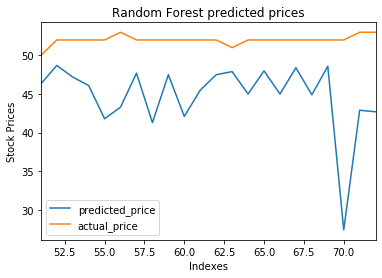

In [56]:
ax = predictions_df_.rename(columns={"Prices": "predicted_price"}).plot(title='Random Forest predicted prices')#predicted value
ax.set_xlabel("Indexes")
ax.set_ylabel("Stock Prices")
fig = y_test.rename(columns={"Prices": "actual_price"}).plot(ax = ax).get_figure()#actual value
#fig.savefig("random forest.png")

In [58]:
from treeinterpreter import treeinterpreter as ti
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix

reg = LinearRegression()
reg.fit(numpy_df_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
reg.predict(numpy_df_test)

array([[52.36070816],
       [47.36935151],
       [48.97759256],
       [41.5064323 ],
       [43.02190656],
       [42.66790384],
       [51.34022243],
       [44.61794414],
       [49.21318079],
       [47.17404495],
       [43.10246988],
       [51.57948191],
       [48.97332645],
       [42.85710867],
       [50.69814636],
       [42.01178868],
       [46.22618518],
       [41.14632785],
       [46.82797959],
       [37.92007278],
       [45.88379107],
       [46.49352284]])

In [60]:
# Performance metrics
errors = abs(prediction - y_test)
print('Metrics for Random Forest Trained on Expanded Data')
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')

Metrics for Random Forest Trained on Expanded Data
Average absolute error: Prices    7.19
dtype: float64 degrees.


In [61]:
# Calculate mean absolute percentage error (MAPE)
mape = np.mean(100 * (errors / y_test))
mape

Prices    13.797278
dtype: float64

In [62]:
# Calculate and display accuracy
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: Prices    86.2
dtype: float64 %.
